In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from PIL import Image
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer


Q1)

In [2]:
test=pd.read_csv('mnist_test.csv')

train=pd.read_csv('mnist_train.csv')

x_train=train.iloc[:5000,1:]
y_train=train.iloc[:5000,0]

x_test=test.iloc[:5000,1:]
y_test=test.iloc[:5000,0]

print(x_train.shape)

(5000, 784)


In [3]:
m = svm.SVC()
m.fit(x_train, y_train)
y_pred = m.predict(x_test)
print("accuracy score:",accuracy_score(y_test, y_pred))
print("Classification Matrix:",metrics.classification_report(y_test, y_pred)) 

c:\Users\xfini\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 0.618
- 0.619
- 0.620
- 0.621
- 0.622
- ...
Feature names seen at fit time, yet now missing:
- 1.1
- 107
- 108
- 11
- 11.1
- ...

  warnings.warn(message, FutureWarning)


accuracy score: 0.9318
Classification Matrix:               precision    recall  f1-score   support

           0       0.95      0.98      0.97       460
           1       0.96      0.98      0.97       571
           2       0.94      0.93      0.93       530
           3       0.91      0.92      0.91       501
           4       0.91      0.95      0.93       500
           5       0.92      0.93      0.93       456
           6       0.95      0.94      0.95       462
           7       0.93      0.89      0.91       511
           8       0.94      0.90      0.92       489
           9       0.92      0.90      0.91       520

    accuracy                           0.93      5000
   macro avg       0.93      0.93      0.93      5000
weighted avg       0.93      0.93      0.93      5000



In [4]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
print("Classification Matrix:",metrics.classification_report(y_test, y_pred)) 

c:\Users\xfini\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 0.618
- 0.619
- 0.620
- 0.621
- 0.622
- ...
Feature names seen at fit time, yet now missing:
- 1.1
- 107
- 108
- 11
- 11.1
- ...

  warnings.warn(message, FutureWarning)


Gaussian Naive Bayes model accuracy(in %): 54.64
Classification Matrix:               precision    recall  f1-score   support

           0       0.79      0.91      0.84       460
           1       0.64      0.98      0.78       571
           2       0.77      0.25      0.37       530
           3       0.64      0.32      0.43       501
           4       0.63      0.13      0.22       500
           5       0.50      0.07      0.12       456
           6       0.63      0.84      0.72       462
           7       0.82      0.37      0.51       511
           8       0.29      0.66      0.40       489
           9       0.44      0.90      0.59       520

    accuracy                           0.55      5000
   macro avg       0.62      0.54      0.50      5000
weighted avg       0.62      0.55      0.50      5000



Optimizing Hyperparameters for SVC

In [5]:

# param_grid = {'C': [0.1, 1, 10, 100],  
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
#               'gamma':['scale', 'auto'],
#               'kernel': ['linear','rbf','poly','sigmoid']} 
   
param_grid={'C': [10], 'break_ties':[ False], 'cache_size':[ 200], 'class_weight': [None], 'coef0': [0.0], 'decision_function_shape': ['ovr'], 'degree': [3], 'gamma': ['scale'], 'kernel': ['rbf'], 'max_iter': [-1], 'probability': [False], 'random_state': [None], 'shrinking': [True], 'tol': [0.001], 'verbose': [False]}
grid_svm= GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid_svm.fit(x_train, y_train) 
 
# print best parameter after tuning 
# print("best:",grid.best_params_) 
grid_svmp = grid_svm.predict(x_test) 
print("accuracy score:",accuracy_score(y_test, grid_svmp))
# print(grid.best_estimator_.get_params())
# print classification report 
print("Classification Matrix:",metrics.classification_report(y_test, grid_svmp)) 


# [CV 4/5] END ....C=100, gamma=scale, kernel=rbf;, score=0.965 total time=  17.9s

Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\xfini\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 0.618
- 0.619
- 0.620
- 0.621
- 0.622
- ...
Feature names seen at fit time, yet now missing:
- 1.1
- 107
- 108
- 11
- 11.1
- ...

  warnings.warn(message, FutureWarning)


accuracy score: 0.9406
Classification Matrix:               precision    recall  f1-score   support

           0       0.95      0.98      0.97       460
           1       0.95      0.99      0.97       571
           2       0.95      0.94      0.94       530
           3       0.92      0.94      0.93       501
           4       0.92      0.95      0.93       500
           5       0.94      0.94      0.94       456
           6       0.95      0.95      0.95       462
           7       0.94      0.90      0.92       511
           8       0.96      0.91      0.93       489
           9       0.93      0.91      0.92       520

    accuracy                           0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000



Optimizing Hyperparameters for GNB

In [6]:
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)
# print(np.logspace(0,-9, num=10))
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

grid_gnb = GridSearchCV(estimator=gnb, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')


grid_gnb.fit(x_train, y_train)

print("best hyperparameters:",grid_gnb.best_params_)
print("best score:",grid_gnb.best_score_)
grid_gnbp = grid_gnb.predict(x_test)

print("accuracy score:",accuracy_score(y_test, grid_gnbp))
print("Classification Matrix:",metrics.classification_report(y_test, grid_gnbp)) 


Fitting 15 folds for each of 100 candidates, totalling 1500 fits


Q2)Creating Train Set with Labels

In [ ]:
from PIL import Image
import numpy as np
import sys
import os
import csv
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from PIL import Image
from sklearn import preprocessing
from PIL import Image
columnNames = list()

for i in range(784):
    pixel = 'label'
    pixel += str(i)
    columnNames.append(pixel)

# default format can be changed as needed
def createFileList(myDir, format='.jpg'):
    fileList = []
    print(myDir)
    for root, dirs, files in os.walk(myDir, topdown=False):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)
    return fileList

# load the original image
myFileList = createFileList('MNIST_Dataset/archive/trainingSample/trainingSample')
train_data = pd.DataFrame(columns = columnNames)
for file in myFileList:
    print(file)
    img_file = Image.open(file)
    # img_file.show()

    # get original image parameters...
    width, height = 28,28
    format = img_file.format
    mode = img_file.mode

    # Make image Greyscale
    img_grey = img_file.convert('L')
    #img_grey.save('result.png')
    #img_grey.show()

    rawData = img_grey.load()
    
    # Save Greyscale values
    value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1], img_grey.size[0]))
    value = value.flatten()
    #print(value)
    k = 0

        #print data  
    train_data.loc[i] = [value[k] for k in range(784)]
    i=i+1
print(train_data)

train_data.to_csv("train_converted.csv",index = False)

d=pd.read_csv('train_converted.csv')
tr1=[]
for j in range(10):
    tr=[j for i in range(60)]
    for k in tr:
        tr1.append(k)
d['tr']=tr1
d.to_csv('trainf.csv',index=False)

MNIST_Dataset/archive/trainingSample/trainingSample
MNIST_Dataset/archive/trainingSample/trainingSample\0\img_1.jpg
MNIST_Dataset/archive/trainingSample/trainingSample\0\img_108.jpg
MNIST_Dataset/archive/trainingSample/trainingSample\0\img_110.jpg
MNIST_Dataset/archive/trainingSample/trainingSample\0\img_111.jpg
MNIST_Dataset/archive/trainingSample/trainingSample\0\img_114.jpg
MNIST_Dataset/archive/trainingSample/trainingSample\0\img_129.jpg
MNIST_Dataset/archive/trainingSample/trainingSample\0\img_141.jpg
MNIST_Dataset/archive/trainingSample/trainingSample\0\img_146.jpg
MNIST_Dataset/archive/trainingSample/trainingSample\0\img_149.jpg
MNIST_Dataset/archive/trainingSample/trainingSample\0\img_153.jpg
MNIST_Dataset/archive/trainingSample/trainingSample\0\img_157.jpg
MNIST_Dataset/archive/trainingSample/trainingSample\0\img_17.jpg
MNIST_Dataset/archive/trainingSample/trainingSample\0\img_183.jpg
MNIST_Dataset/archive/trainingSample/trainingSample\0\img_188.jpg
MNIST_Dataset/archive/train

Creating Test Set

In [ ]:
from PIL import Image
import numpy as np
import sys
import os
import csv
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from PIL import Image
from sklearn import preprocessing
from PIL import Image
columnNames = list()

for i in range(784):
    pixel = 'label'
    pixel += str(i)
    columnNames.append(pixel)

# default format can be changed as needed
def createFileList(myDir, format='.jpg'):
    fileList = []
    print(myDir)
    for root, dirs, files in os.walk(myDir, topdown=False):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)
    return fileList

# load the original image
myFileList = createFileList('MNIST_Dataset/archive/testSample/testSample')
train_data = pd.DataFrame(columns = columnNames)
for file in myFileList:
    print(file)
    img_file = Image.open(file)
    # img_file.show()

    # get original image parameters...
    width, height = 28,28
    format = img_file.format
    mode = img_file.mode

    # Make image Greyscale
    img_grey = img_file.convert('L')
    #img_grey.save('result.png')
    #img_grey.show()

    rawData = img_grey.load()
    
    # Save Greyscale values
    value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1], img_grey.size[0]))
    value = value.flatten()
    #print(value)
    k = 0

        #print data  
    train_data.loc[i] = [value[k] for k in range(784)]
    i=i+1
print(train_data)

train_data.to_csv("test.csv",index = False)


MNIST_Dataset/archive/testSample/testSample
MNIST_Dataset/archive/testSample/testSample\img_1.jpg
MNIST_Dataset/archive/testSample/testSample\img_10.jpg
MNIST_Dataset/archive/testSample/testSample\img_100.jpg
MNIST_Dataset/archive/testSample/testSample\img_101.jpg
MNIST_Dataset/archive/testSample/testSample\img_102.jpg
MNIST_Dataset/archive/testSample/testSample\img_103.jpg
MNIST_Dataset/archive/testSample/testSample\img_104.jpg
MNIST_Dataset/archive/testSample/testSample\img_105.jpg
MNIST_Dataset/archive/testSample/testSample\img_106.jpg
MNIST_Dataset/archive/testSample/testSample\img_107.jpg
MNIST_Dataset/archive/testSample/testSample\img_108.jpg
MNIST_Dataset/archive/testSample/testSample\img_109.jpg
MNIST_Dataset/archive/testSample/testSample\img_11.jpg
MNIST_Dataset/archive/testSample/testSample\img_110.jpg
MNIST_Dataset/archive/testSample/testSample\img_111.jpg
MNIST_Dataset/archive/testSample/testSample\img_112.jpg
MNIST_Dataset/archive/testSample/testSample\img_113.jpg
MNIST_Da

In [ ]:
import pandas as pd
import numpy as np
from sklearn import svm
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from PIL import Image
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer

test=pd.read_csv('test.csv')

train=pd.read_csv('trainf.csv')
xt=train.iloc[:,:-1]
yt=train.iloc[:,-1]
print(xt.head())
print(yt.head())
x_train, x_test, y_train, y_test= train_test_split(xt, yt, train_size=0.800, random_state=101,shuffle=True)

   label0  label1  label2  label3  label4  label5  label6  label7  label8  \
0       3       0       0       3       7       3       0       3       0   
1       0       0       0       0       0       0       0       0       5   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   label9  ...  label774  label775  label776  label777  label778  label779  \
0      11  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       3  ...         0         0         0         0         0         0   
3       8  ...         0         0         0         0         0         0   
4       5  ...         0         0         0         0         0         0   

   label780  label781  label782  label783  
0         0         0   

In [ ]:

m = svm.SVC()
m.fit(x_train, y_train)
y_pred = m.predict(x_test)

print("accuracy score of svm:",accuracy_score(y_test, y_pred)*100)

gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)


accuracy score of svm: 81.66666666666667
Gaussian Naive Bayes model accuracy(in %): 62.5


With GridsearchCV SVM

In [ ]:

param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear','rbf','poly','sigmoid']} 
   
# param_grid={'C': [10], 'break_ties':[ False], 'cache_size':[ 200], 'class_weight': [None], 'coef0': [0.0], 'decision_function_shape': ['ovr'], 'degree': [3], 'gamma': ['scale'], 'kernel': ['rbf'], 'max_iter': [-1], 'probability': [False], 'random_state': [None], 'shrinking': [True], 'tol': [0.001], 'verbose': [False]}
grid_svm = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid_svm.fit(x_train, y_train) 
 
# print best parameter after tuning 
# print("best:",grid.best_params_) 
grid_svmp = grid_svm.predict(x_test) 
print("accuracy score:",accuracy_score(y_test, grid_svmp))
# print(grid.best_estimator_.get_params())
# print classification report 
print("Classification Matrix:",metrics.classification_report(y_test, grid_svmp)) 


Fitting 5 folds for each of 32 candidates, totalling 160 fits
accuracy score: 0.8416666666666667
Classification Matrix:               precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.92      0.92      0.92        12
           2       0.92      0.92      0.92        12
           3       0.92      0.92      0.92        12
           4       0.76      0.93      0.84        14
           5       0.85      0.85      0.85        20
           6       0.67      0.60      0.63        10
           7       0.86      0.86      0.86         7
           8       0.78      1.00      0.88         7
           9       0.73      0.73      0.73        11

    accuracy                           0.84       120
   macro avg       0.84      0.84      0.84       120
weighted avg       0.85      0.84      0.84       120



In [ ]:
grid_svmp= grid_svm.predict(test) 
print(grid_svmp)

[2 3 7 0 3 2 0 7 3 0 5 0 5 4 6 0 4 7 1 7 1 1 3 7 3 3 7 2 8 6 3 8 7 6 9 4 3
 5 6 0 0 0 3 1 3 0 6 4 3 4 5 5 8 7 7 2 4 8 4 3 5 6 5 1 7 5 7 5 8 3 0 4 5 1
 8 7 6 4 2 0 3 7 9 6 1 3 7 4 1 1 2 4 3 5 2 4 9 2 1 6 9 0 6 1 4 4 6 0 9 7 6
 0 0 9 1 9 0 9 9 0 8 4 6 9 2 0 9 3 6 7 2 1 6 3 1 4 2 3 1 0 2 8 4 6 1 1 0 0
 4 9 1 7 3 2 3 8 5 6 8 6 2 8 5 5 9 8 3 7 8 9 7 1 3 8 4 5 1 4 4 3 6 3 3 5 7
 0 6 8 6 2 1 6 0 6 3 9 9 1 9 8 7 4 0 9 2 0 5 3 7 1 9 7 9 5 7 7 9 9 6 3 0 3
 9 7 3 6 9 8 2 6 3 7 1 4 7 5 8 5 9 0 0 3 8 4 1 5 8 4 1 1 9 8 4 5 1 5 4 3 6
 3 1 3 0 9 0 5 6 2 0 6 2 1 8 6 0 6 5 2 6 2 2 5 5 1 4 6 7 7 4 9 8 7 8 8 6 3
 1 6 8 8 3 8 2 1 2 4 7 5 4 1 7 0 0 0 1 4 0 0 1 6 5 8 8 2 8 2 9 2 3 3 5 9 1
 0 9 2 4 3 6 0 7 2 0 6 6 1 4 3 9 7]


With GridsearchCV GNB

In [ ]:

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)
print(np.logspace(0,-9, num=10))
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

grid_gnb = GridSearchCV(estimator=gnb, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')



grid_gnb.fit(x_train, y_train)

print("best hyperparameters:",grid_gnb.best_params_)
print("best score:",grid_gnb.best_score_)
grid_gnbp = grid_gnb.predict(x_test)
print("accuracy score:",accuracy_score(y_test, grid_gnbp))
print("Classification Matrix:",metrics.classification_report(y_test, grid_gnbp)) 

[1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07 1.e-08 1.e-09]
Fitting 15 folds for each of 100 candidates, totalling 1500 fits
best hyperparameters: {'var_smoothing': 0.1}
best score: 0.7770833333333333
accuracy score: 0.7583333333333333
Classification Matrix:               precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.73      0.92      0.81        12
           2       0.90      0.75      0.82        12
           3       0.92      0.92      0.92        12
           4       0.71      0.71      0.71        14
           5       0.91      0.50      0.65        20
           6       0.55      0.60      0.57        10
           7       1.00      1.00      1.00         7
           8       0.42      0.71      0.53         7
           9       0.64      0.82      0.72        11

    accuracy                           0.76       120
   macro avg       0.77      0.78      0.76       120
weighted avg       0.79  

In [ ]:
grid_gnbp1 = grid_gnb.predict(test) 
print(grid_gnbp1)

[2 3 9 0 9 1 0 7 9 0 5 0 8 4 6 0 6 1 1 8 1 1 8 7 8 3 7 2 1 6 3 8 7 8 4 9 3
 8 6 0 0 0 3 1 3 0 6 4 3 4 5 5 8 7 7 2 4 1 4 3 5 6 5 1 7 5 7 5 8 3 0 4 5 1
 1 7 6 3 3 0 2 7 9 6 1 3 7 4 1 1 2 4 8 5 6 4 9 2 1 6 9 0 6 1 4 4 6 0 9 7 6
 0 0 9 1 9 0 9 9 0 8 4 6 9 2 0 9 3 6 7 8 1 6 3 1 9 2 3 1 2 2 8 9 6 1 1 0 0
 9 9 1 7 2 2 8 8 5 6 8 6 2 5 9 5 9 8 8 7 9 9 7 1 9 8 4 8 1 9 9 3 6 3 8 5 7
 0 6 8 6 2 1 6 0 6 3 8 4 1 9 8 7 4 0 9 2 0 5 3 7 9 4 9 9 8 9 7 9 9 6 3 0 5
 9 7 3 6 9 8 8 6 2 7 1 9 7 5 8 5 9 8 0 3 8 4 1 5 8 9 1 1 9 8 4 9 1 5 4 8 6
 3 1 3 0 8 0 6 6 2 8 6 2 1 8 6 0 6 5 3 6 8 2 9 5 5 4 6 7 7 4 9 8 7 1 8 6 2
 1 6 8 1 3 8 2 1 8 6 7 0 9 1 7 0 0 0 1 9 0 0 1 6 8 8 8 8 5 4 9 2 3 3 8 9 1
 0 9 2 4 3 6 0 7 2 0 6 6 8 9 3 9 7]


PCA


In [ ]:

import matplotlib_inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

test=pd.read_csv('test.csv')
train=pd.read_csv('trainf.csv')
xt=train.iloc[:,:-1]
yt=train.iloc[:,-1]
# print(xt.head())
# x_train, x_test, y_train, y_test= train_test_split(xt, yt, train_size=0.800, random_state=101,shuffle=True)

s=StandardScaler()
s.fit(xt)
train1=s.transform(xt)
# print(train1)

#PCA

pca=PCA(n_components=0.95)
pca.fit(train1)
train2=pca.transform(train1)

print(train2.shape)



(600, 229)


Plotting covariance matrix


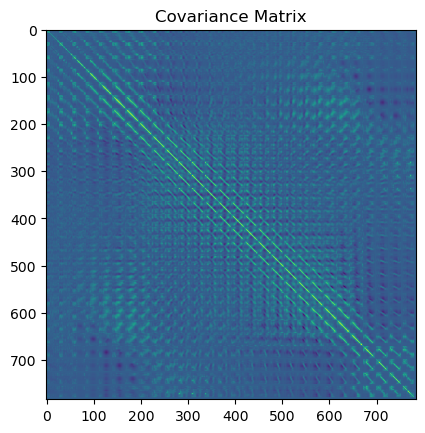

In [ ]:
plt.imshow(pca.get_covariance())
plt.title("Covariance Matrix")
plt.show()

 Plot the percentage variance of eigen values of the covariance matrix vs. component 
number

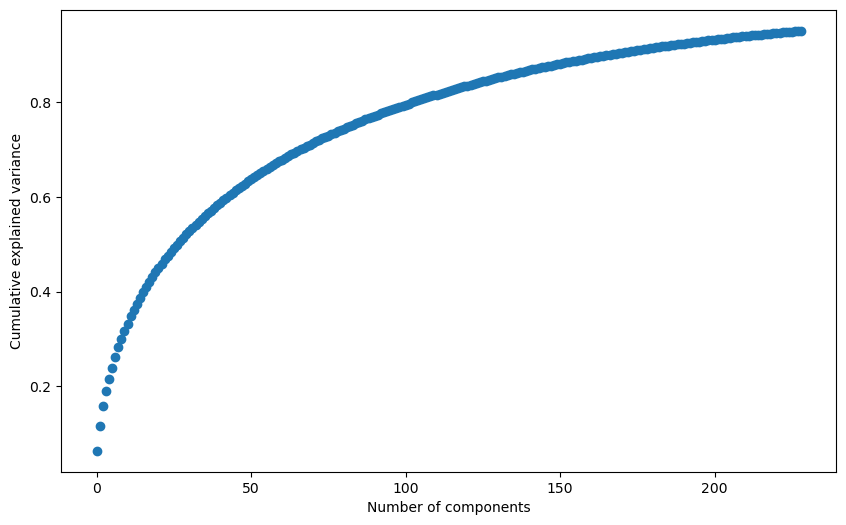

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_),'o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()


Plotting principle components

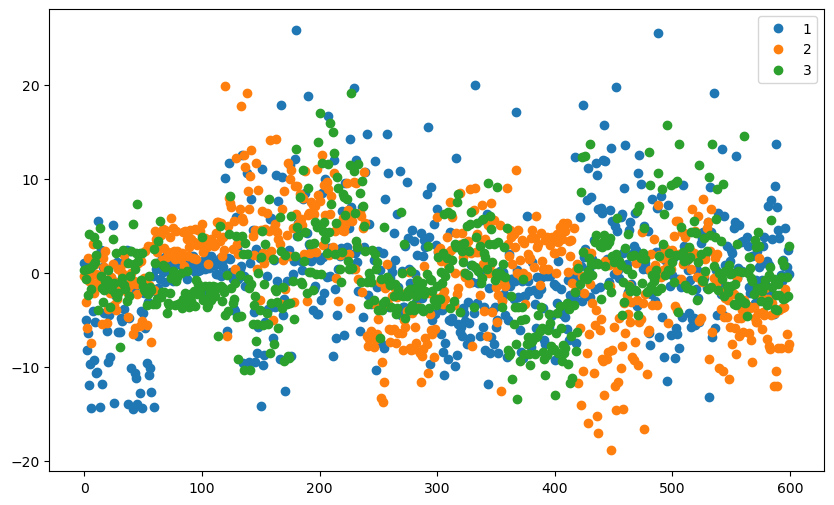

In [ ]:

plt.figure(figsize=(10,6))
plt.plot(train2[:,1],'o')
plt.plot(train2[:,2],'o')
plt.plot(train2[:,3],'o')
plt.legend(['1','2','3'])
plt.show()

Size reduction

In [ ]:

print(train.shape)
print(train2.shape)
dimred=(785-229)/785 *100
print(dimred)

(600, 785)
(600, 229)
70.828025477707


SVM with PCA And GridSearchCV

In [ ]:

df=pd.DataFrame(train2)
# print(df)
x_train, x_test, y_train, y_test= train_test_split(df, yt, train_size=0.800, random_state=101,shuffle=True)

m = svm.SVC()
m.fit(x_train, y_train)
y_pred = m.predict(x_test)

print("accuracy score:",accuracy_score(y_test, y_pred))

gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)




accuracy score: 0.8
Gaussian Naive Bayes model accuracy(in %): 57.49999999999999


SVM with PCA And GridSearchCV

In [ ]:
# param_grid = {'C': [0.1, 1, 10, 100],  
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
#               'gamma':['scale', 'auto'],
#               'kernel': ['linear','rbf','poly','sigmoid']} 
   
param_grid={'C': [10], 'break_ties':[ False], 'cache_size':[ 200], 'class_weight': [None], 'coef0': [0.0], 'decision_function_shape': ['ovr'], 'degree': [3], 'gamma': ['scale'], 'kernel': ['rbf'], 'max_iter': [-1], 'probability': [False], 'random_state': [None], 'shrinking': [True], 'tol': [0.001], 'verbose': [False]}
grid_svm= GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid_svm.fit(x_train, y_train) 
 
# print best parameter after tuning 
# print("best:",grid.best_params_) 
grid_svmp = grid_svm.predict(x_test) 
print("accuracy score:",accuracy_score(y_test, grid_svmp))
# print(grid.best_estimator_.get_params())
# print classification report 
print("Classification Matrix:",metrics.classification_report(y_test, grid_svmp)) 


Fitting 5 folds for each of 1 candidates, totalling 5 fits
accuracy score: 0.8166666666666667
Classification Matrix:               precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       1.00      0.92      0.96        12
           2       0.65      0.92      0.76        12
           3       0.91      0.83      0.87        12
           4       0.86      0.86      0.86        14
           5       0.94      0.80      0.86        20
           6       0.62      0.50      0.56        10
           7       0.60      0.86      0.71         7
           8       0.64      1.00      0.78         7
           9       0.88      0.64      0.74        11

    accuracy                           0.82       120
   macro avg       0.81      0.82      0.80       120
weighted avg       0.84      0.82      0.82       120



GNB with PCA And GridSearchCV

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(df, yt, train_size=0.800, random_state=101,shuffle=True)



cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)
print(np.logspace(0,-9, num=10))
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

grid_gnb = GridSearchCV(estimator=gnb, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

# Data_transformed = PowerTransformer().fit_transform(x_test)

grid_gnb.fit(x_train, y_train)

print("best hyperparameters:",grid_gnb.best_params_)
print("best score:",grid_gnb.best_score_)
grid_gnbp = grid_gnb.predict(x_test)
print("accuracy score:",accuracy_score(y_test, grid_gnbp))
print("Classification Matrix:",metrics.classification_report(y_test, grid_gnbp)) 


[1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07 1.e-08 1.e-09]
Fitting 15 folds for each of 100 candidates, totalling 1500 fits
best hyperparameters: {'var_smoothing': 0.0015199110829529332}
best score: 0.523611111111111
accuracy score: 0.575
Classification Matrix:               precision    recall  f1-score   support

           0       0.80      0.80      0.80        15
           1       0.85      0.92      0.88        12
           2       0.37      0.83      0.51        12
           3       0.75      0.25      0.38        12
           4       0.71      0.36      0.48        14
           5       0.70      0.35      0.47        20
           6       0.80      0.40      0.53        10
           7       0.57      0.57      0.57         7
           8       0.50      0.57      0.53         7
           9       0.38      0.82      0.51        11

    accuracy                           0.57       120
   macro avg       0.64      0.59      0.57       120
weighted avg       0.

Q3)Hand written dataset

In [ ]:
from PIL import Image
import numpy as np
import sys
import os
import csv
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from PIL import Image
from sklearn import preprocessing
from PIL import Image
columnNames = list()

for i in range(784):
    pixel = 'label'
    pixel += str(i)
    columnNames.append(pixel)

# default format can be changed as needed
def createFileList(myDir, format='.jpeg'):
    fileList = []
    print(myDir)
    for root, dirs, files in os.walk(myDir, topdown=False):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)
    return fileList

# load the original image
myFileList = createFileList('ml')
train_data1= pd.DataFrame(columns = columnNames)
for file in myFileList:
    print(file)
    img_file = Image.open(file)
    # img_file.show()

    # get original image parameters...
    width, height = 28,28
    format = img_file.format
    mode = img_file.mode

    # Make image Greyscale
    img_grey = img_file.convert('L')
    #img_grey.save('result.png')
    #img_grey.show()

    rawData = img_grey.load()
    
    # Save Greyscale values
    value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1], img_grey.size[0]))
    value = value.flatten()
    #print(value)
    k = 0

        #print data  
    train_data1.loc[i] = [value[k] for k in range(784)]
    i=i+1
print(train_data1)

train_data1.to_csv("hand.csv",index = False)


ml
ml\0.jpeg
ml\1.jpeg
ml\2.jpeg
ml\3.jpeg
ml\4.jpeg
ml\5.jpeg
ml\6.jpeg
ml\7.jpeg
ml\8.jpeg
ml\9.jpeg
     label0  label1  label2  label3  label4  label5  label6  label7  label8  \
783       0       0       0       0       0       0       0       0       0   
784       0       0       0       0       0       0       0       0       7   
785       9       0       0       4      15       0       0      14       9   
786       1       1       1       0       0       0       0       0       0   
787       0      17       2       0       9      14       0       5       8   
788       4       0       0       6       0      10      22       0       0   
789       1       1       1       0       0       0       0       0       4   
790       0       0       4      12       8       0       0       9       1   
791       0       0       0       0       0       0       0       0       4   
792       0       0       0       1       5       8       4       0       0   

     label9  ...  label774 

In [ ]:
#original dataset for prediction
t=[0,1,2,3,4,5,6,7,8,9]


In [ ]:
import pandas as pd
import numpy as np
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from PIL import Image
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
test=pd.read_csv('test.csv')

df_img=pd.read_csv('hand.csv')
train=pd.read_csv('trainf.csv')
xt=train.iloc[:,:-1]
yt=train.iloc[:,-1]
# print(xt.head())
# print(yt.head())
x_train, x_test, y_train, y_test= train_test_split(xt, yt, train_size=0.800, random_state=101,shuffle=True)


m = svm.SVC()
m.fit(x_train, y_train)
y_pred = m.predict(df_img)
print("SVM prediction :",y_pred)
print("accuracy score:",accuracy_score(t, y_pred))

# # param_grid = {'C': [0.1, 1, 10, 100],  
# #               'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
# #               'gamma':['scale', 'auto'],
# #               'kernel': ['linear','rbf','poly','sigmoid']} 

#best parameters for svm taken from grid search cv 
param_grid={'C': [10], 'break_ties':[ False], 'cache_size':[ 200], 'class_weight': [None], 'coef0': [0.0], 'decision_function_shape': ['ovr'], 'degree': [3], 'gamma': ['scale'], 'kernel': ['rbf'], 'max_iter': [-1], 'probability': [False], 'random_state': [None], 'shrinking': [True], 'tol': [0.001], 'verbose': [False]}
grid_svm = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid_svm.fit(x_train, y_train) 
 
# print best parameter after tuning 
# print("best:",grid.best_params_) 
grid_predictions = grid_svm.predict(x_test) 
print("accuracy score:",accuracy_score(y_test, grid_predictions))
# print(grid.best_estimator_.get_params())
# print classification report 
print(metrics.classification_report(y_test, grid_predictions)) 


# [CV 4/5] END ....C=100, gamma=scale, kernel=rbf;, score=0.965 total time=  17.9s


grid_svmp = grid_svm.predict(df_img) 
print("SVM Prediction with gridsearchcv",grid_svmp)
print(accuracy_score(t, grid_svmp))

SVM prediction : [0 3 2 3 4 5 2 7 6 9]
accuracy score: 0.7
Fitting 5 folds for each of 1 candidates, totalling 5 fits
accuracy score: 0.8416666666666667
              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.92      0.92      0.92        12
           2       0.92      0.92      0.92        12
           3       0.92      0.92      0.92        12
           4       0.76      0.93      0.84        14
           5       0.85      0.85      0.85        20
           6       0.67      0.60      0.63        10
           7       0.86      0.86      0.86         7
           8       0.78      1.00      0.88         7
           9       0.73      0.73      0.73        11

    accuracy                           0.84       120
   macro avg       0.84      0.84      0.84       120
weighted avg       0.85      0.84      0.84       120

SVM Prediction with gridsearchcv [0 1 2 3 4 5 2 7 6 9]
0.8


In [ ]:
import pandas as pd
import numpy as np
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from PIL import Image
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer
test=pd.read_csv('test.csv')

train=pd.read_csv('trainf.csv')
xt=train.iloc[:,:-1]
yt=train.iloc[:,-1]
# print(xt.head())
# print(yt.head())
x_train, x_test, y_train, y_test= train_test_split(xt, yt, train_size=0.800, random_state=101,shuffle=True)
df=pd.read_csv("hand.csv")

gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(df)
print("Gaussian Naive Bayes prediction :",y_pred)
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(t, y_pred)*100)


cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)
# print(np.logspace(0,-9, num=10))
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gsrid_gnb = GridSearchCV(estimator=gnb, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')


gsrid_gnb.fit(x_train, y_train)

print("best hyperparameters:",gsrid_gnb.best_params_)
print("best score:",gsrid_gnb.best_score_)
grid_predictions = gsrid_gnb.predict(x_test)

print(metrics.classification_report(y_test, grid_predictions)) 

df=pd.read_csv("hand.csv")
grid_gnbp = gsrid_gnb.predict(df)
# print(grid_gnbp)

print("Gaussian Naive Bayes prediction with gridsearchcv:",grid_gnbp)
print(accuracy_score(t, grid_gnbp))


Gaussian Naive Bayes prediction : [0 4 2 3 4 3 2 4 6 7]
Gaussian Naive Bayes model accuracy(in %): 40.0
Fitting 15 folds for each of 100 candidates, totalling 1500 fits
best hyperparameters: {'var_smoothing': 0.1}
best score: 0.7770833333333333
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.73      0.92      0.81        12
           2       0.90      0.75      0.82        12
           3       0.92      0.92      0.92        12
           4       0.71      0.71      0.71        14
           5       0.91      0.50      0.65        20
           6       0.55      0.60      0.57        10
           7       1.00      1.00      1.00         7
           8       0.42      0.71      0.53         7
           9       0.64      0.82      0.72        11

    accuracy                           0.76       120
   macro avg       0.77      0.78      0.76       120
weighted avg       0.79      0.76      0.76       1